<a href="https://colab.research.google.com/github/abidiDev/data-mining/blob/main/Copie_de_customer_segmentation_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES</p>

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

<a id="2"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING DATA</p>

In [ ]:
#Loading the dataset
data = pd.read_excel("CreditBank.xlsx")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 149


/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,revenuAnnuel,autreRevenu,salaire,age,anneeTravaillee,nbDernierCreditRefuse,nbDernierCreditQccepte,PersonnesEnCharge,RevenuNetMoyen,nbVoitures,catgSocialePro,statutSocial,Residence,secteurTravail,Decision
0,29921.0,0,2493.416667,51,10,0,1,1,831.138889,2,Titular,Single,House Owner,Others,Accepted
1,22912.0,530,1379.333333,32,5,3,2,1,636.444444,1,Titular,Single,Living with parents,Developpement,Accepted
2,15780.0,0,1315.000000,30,5,3,0,2,438.333333,0,Titular,Single,Living with parents,Agriculture,Refused
3,31293.0,848,1759.750000,29,5,2,2,0,869.250000,1,Contractual,Single,Living with parents,Others,Accepted
4,14312.0,0,1192.666667,36,10,2,2,2,397.555556,1,Titular,Single,House Owner,Handwork,Tolerated


In [ ]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   revenuAnnuel            149 non-null    float64
 1   autreRevenu             149 non-null    int64  
 2   salaire                 149 non-null    float64
 3   age                     149 non-null    int64  
 4   anneeTravaillee         149 non-null    int64  
 5   nbDernierCreditRefuse   149 non-null    int64  
 6   nbDernierCreditQccepte  149 non-null    int64  
 7   PersonnesEnCharge       149 non-null    int64  
 8   RevenuNetMoyen          149 non-null    float64
 9   nbVoitures              149 non-null    int64  
 10  catgSocialePro          149 non-null    object 
 11  statutSocial            149 non-null    object 
 12  Residence               149 non-null    object 
 13  secteurTravail          149 non-null    object 
 14  Decision                149 non-null    ob

In [ ]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 149


Now we will be exploring the unique values in the categorical features to get a clear idea of the data.  

In [ ]:
print("Total categories in the feature statutSocial:\n", data["statutSocial"].value_counts(), "\n")
print("Total categories in the feature secteurTravail:\n", data["secteurTravail"].value_counts())

Total categories in the feature statutSocial:
 Single     82
Married    67
Name: statutSocial, dtype: int64 

Total categories in the feature secteurTravail:
 Education            25
Telecommunication    23
Public Services      22
Developpement        17
Others               13
Handwork             13
Manufacturing        13
Commerce             13
Agriculture          10
Name: secteurTravail, dtype: int64



* Dropping some columns

In [ ]:

#Dropping some columns
to_drop = ["nbDernierCreditRefuse", "nbDernierCreditQccepte", "PersonnesEnCharge"]
data = data.drop(to_drop, axis=1)

Now that we have some new features let's have a look at the data's stats. 

In [ ]:
data.describe()

,revenuAnnuel,autreRevenu,salaire,age,anneeTravaillee,RevenuNetMoyen,nbVoitures
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,19472.194631,94.268456,1528.414430,41.973154,6.261745,540.894295,1.073826
std,6900.738472,225.918415,519.454614,14.923203,5.320023,191.687180,0.668742
min,8418.000000,0.000000,701.500000,20.000000,1.000000,233.833333,0.000000
25%,14199.000000,0.000000,1127.583333,29.000000,2.000000,394.416667,1.000000
50%,18416.000000,0.000000,1479.333333,39.000000,5.000000,511.555556,1.000000
75%,25634.000000,0.000000,1974.666667,53.000000,10.000000,712.055556,1.000000
max,37536.000000,871.000000,2493.416667,77.000000,20.000000,1042.666667,3.000000


Clearly, there are a few outliers in the Income and Age features. 
I will be deleting the outliers in the data. 

In [ ]:
#Dropping the outliers by setting a cap on income. 
#data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 149


Next, let us look at the correlation amongst the features. 
(Excluding the categorical attributes at this point)

<ipython-input-8-0d839342c2f6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat= data.corr()


<Axes: >

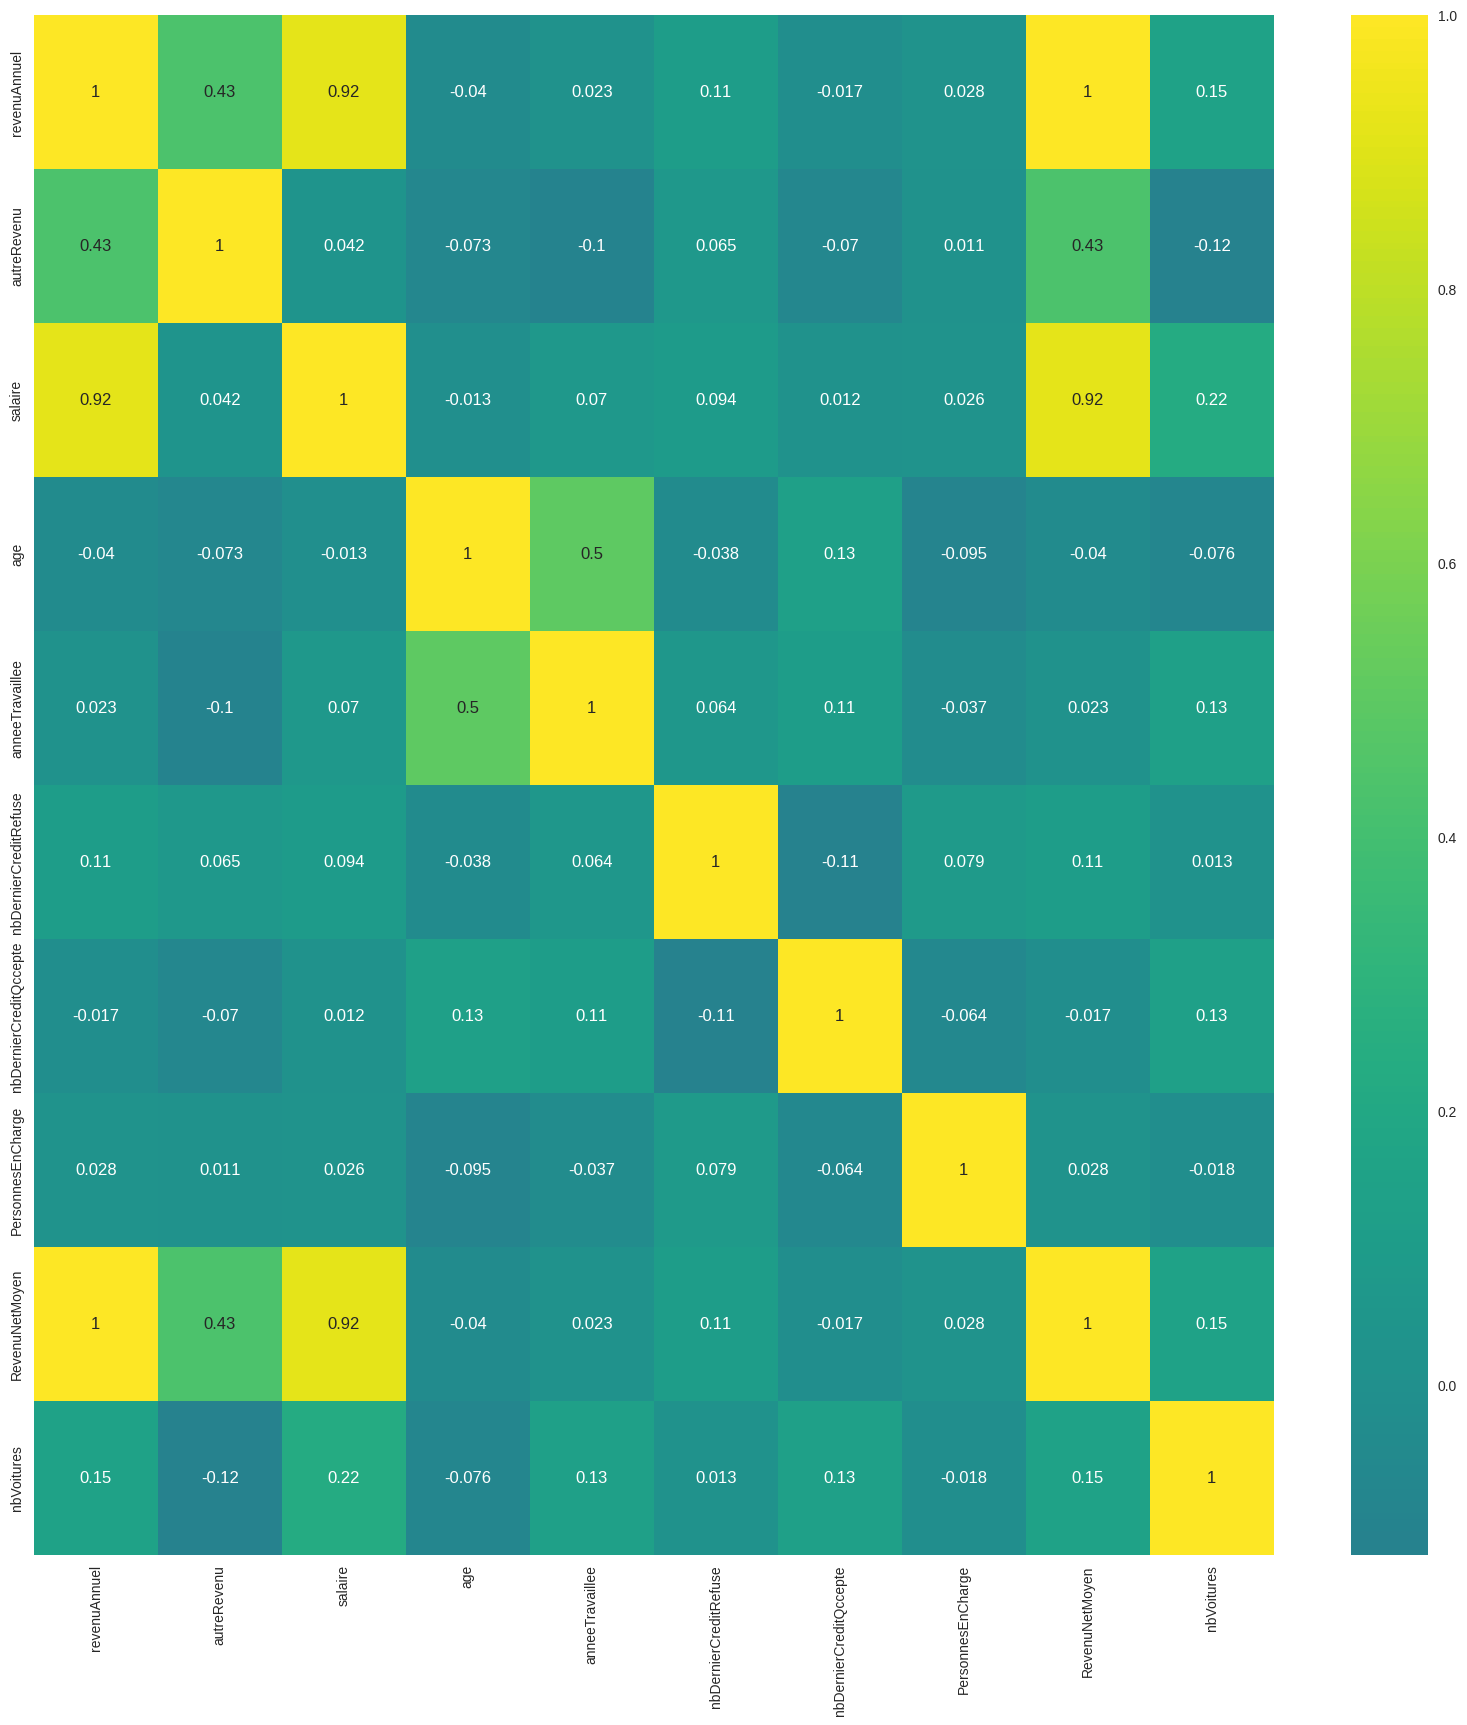

In [ ]:
#correlation matrix
cmap = 'viridis'

corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

The data is quite clean and the new features have been included. I will proceed to the next step. That is, preprocessing the data. 

<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA PREPROCESSING</p>

In this section, I will be preprocessing the data to perform clustering operations.

**The following steps are applied to preprocess the data:**

* Label encoding the categorical features
* Scaling the features using the standard scaler 
* Creating a subset dataframe for dimensionality reduction

In [ ]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['catgSocialePro', 'statutSocial', 'Residence', 'secteurTravail', 'Decision']


In [ ]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [ ]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['Decision']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,revenuAnnuel,autreRevenu,salaire,age,anneeTravaillee,nbDernierCreditRefuse,nbDernierCreditQccepte,PersonnesEnCharge,RevenuNetMoyen,nbVoitures,catgSocialePro,statutSocial,Residence,secteurTravail
0,1.519264,-0.418675,1.863987,0.606927,0.705046,-1.631339,-0.024708,-0.627683,1.519264,1.389622,0.804302,0.903921,0.085447,0.626204
1,0.500150,1.935217,-0.287963,-0.670552,-0.237969,0.676283,1.202471,-0.627683,0.500150,-0.110767,0.804302,0.903921,1.500075,-0.935376
2,-0.536848,-0.418675,-0.412229,-0.805024,-0.237969,0.676283,-1.251888,0.108732,-0.536848,-1.611156,0.804302,0.903921,1.500075,-1.716166
3,1.718754,3.347552,0.446845,-0.872260,-0.237969,-0.092924,1.202471,-1.364099,1.718754,-0.110767,-1.394616,0.903921,1.500075,0.626204
4,-0.750296,-0.418675,-0.648527,-0.401610,0.705046,-0.092924,1.202471,0.108732,-0.750296,-0.110767,0.804302,0.903921,0.085447,-0.154586


<a id="5"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DIMENSIONALITY REDUCTION</p>
In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.  
*Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.* 

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Steps in this section:**
* Dimensionality reduction with PCA
* Plotting the reduced dataframe

**Dimensionality reduction with PCA**

For this project, I will be reducing the dimensions to 2.

In [ ]:
#Initiating PCA to reduce dimentions aka features to 2
pca = PCA(n_components=2)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,149.0,9.537486e-17,1.785944,-3.109013,-1.419366,-0.167471,1.391865,4.801498
col2,149.0,-4.545208e-17,1.490807,-3.203218,-1.142372,-0.083563,1.068584,3.863771


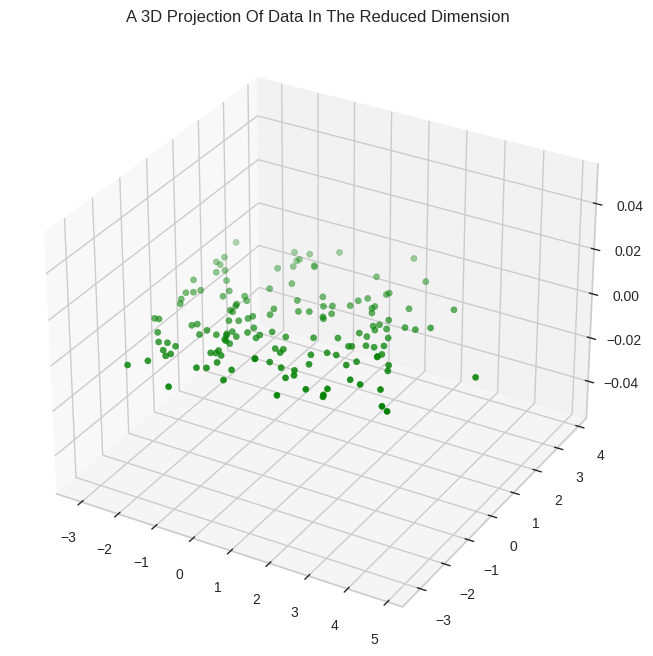

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y, c='Green', marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

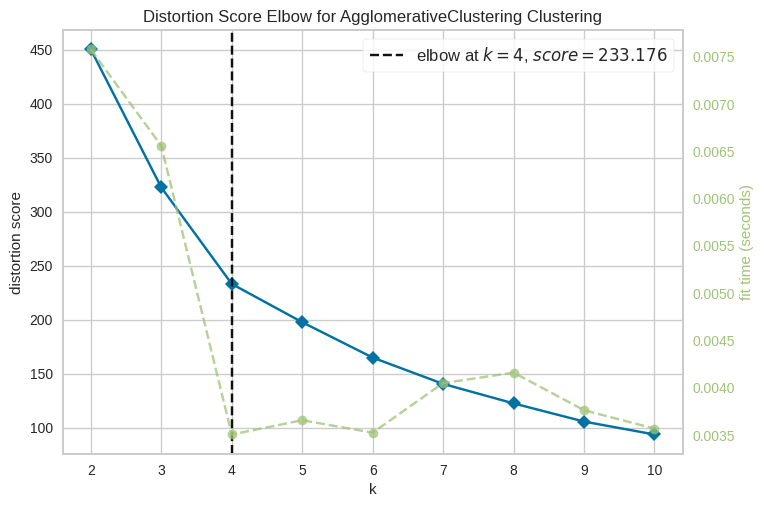

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Import the necessary libraries
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

# Create an instance of the CAH clustering algorithm
cah = AgglomerativeClustering()

)

# Create an instance of the KElbowVisualizer with the CAH estimator
elbow_m = KElbowVisualizer(cah, k=10)

# Fit the KElbowVisualizer to the PCA_ds dataset
elbow_m.fit(PCA_ds)

# Display the elbow plot
elbow_m.show()


<a id="6"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CLUSTERING</p>

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method.  It involves merging examples until the desired number of clusters is achieved.

**Steps involved in the Clustering**
* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

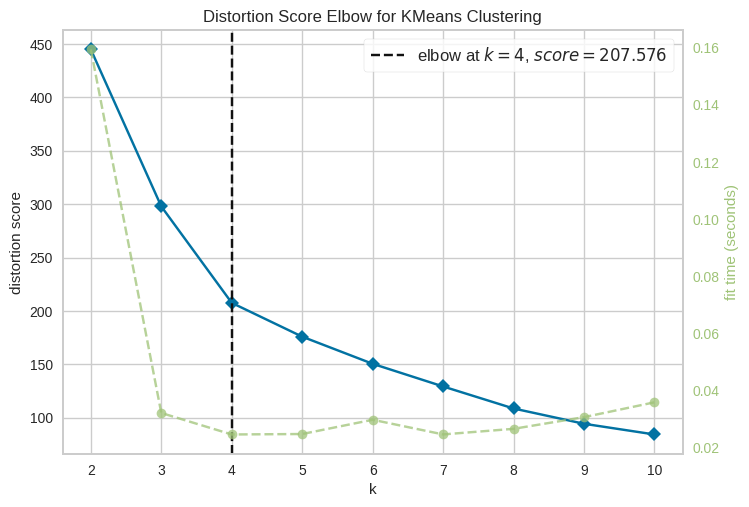

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

The above cell indicates that five will be an optimal number of clusters for this data. 
Next, we will be fitting the Agglomerative Clustering Model to get the final clusters. 

In [ ]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

To examine the clusters formed let's have a look at the 3-D distribution of the clusters. 

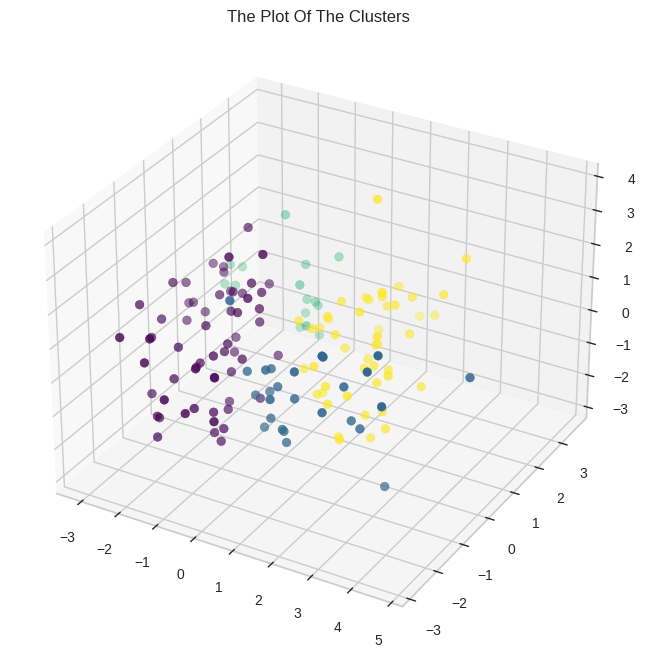

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

<a id="7"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EVALUATING MODELS</p>

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns. 

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions. 

**Firstly, let us have a look at the group distribution of clustring**

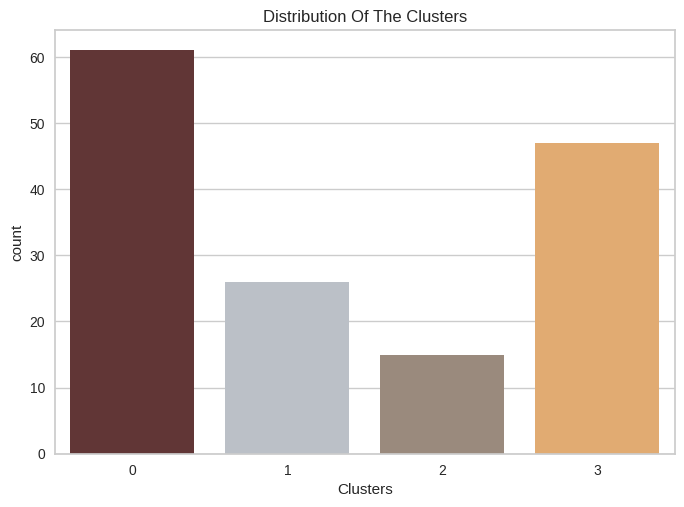

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

The clusters seem to be fairly distributed.

> Bloc en retrait



/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


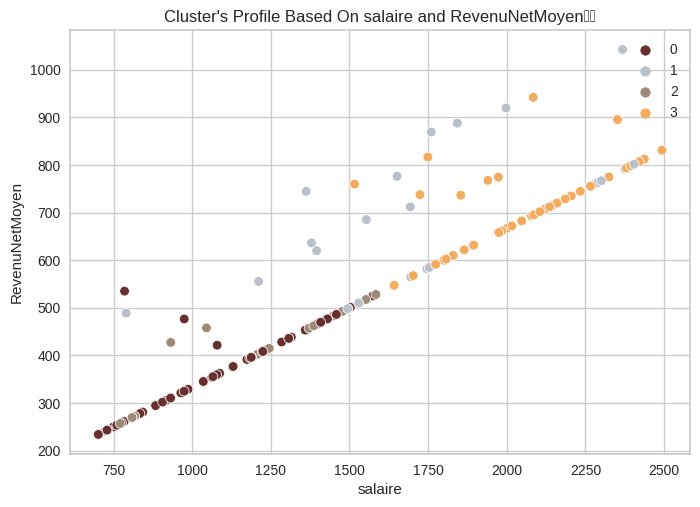

In [ ]:
pl = sns.scatterplot(data = data,x=data["salaire"], y=data["RevenuNetMoyen"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On salaire and RevenuNetMoyen		")
plt.legend()
plt.show()

**Income vs  spending plot shows the clusters pattern**
* group 0: high spending & average income
* group 1: high spending & high income
* group 2: low spending & low income 
* group 3: high spending & low income  

Next, I will be looking at the detailed distribution of clusters as per the various salary


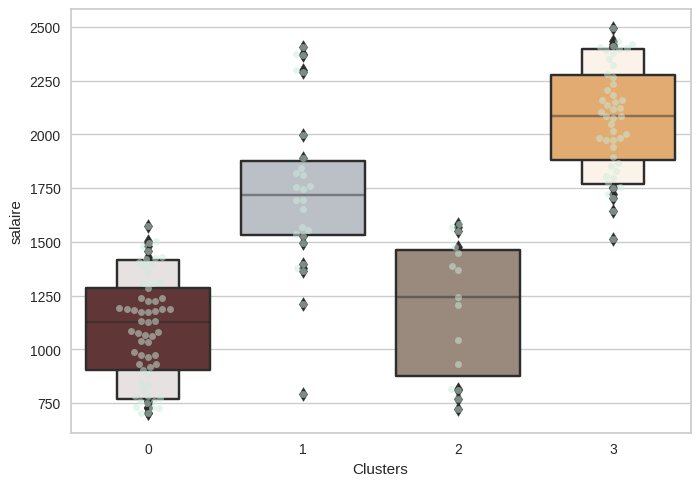

In [ ]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["salaire"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["salaire"], palette=pal)
plt.show()


From the above plot, it can be clearly seen that cluster 1 is our biggest set of customers closely followed by cluster 0.
We can explore what each cluster is spending on for the targeted marketing strategies.


Let us next explore how did our campaigns do in the past.

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales. 


Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 3. 
However, our star customers cluster 1 are not much into the deals. 
Nothing seems to attract cluster 2 overwhelmingly 


**texte en gras**<a id="8"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">PROFILING</p>

Now that we have formed the clusters and looked at their purchasing habits. 
Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. 
On the basis of the outcomes, I will be arriving at the conclusions. 

<Figure size 800x550 with 0 Axes>

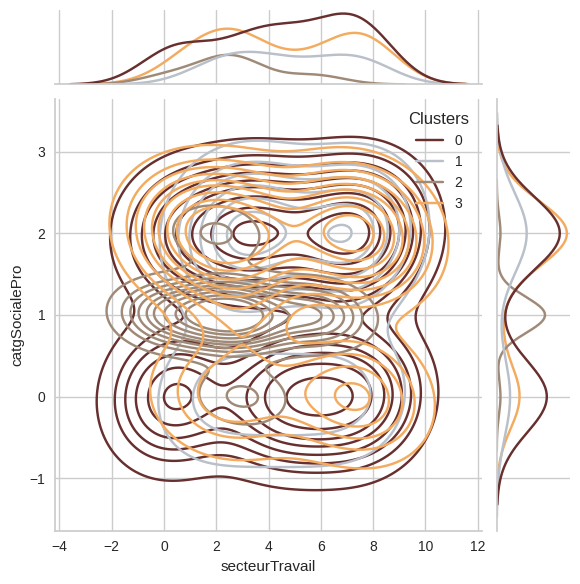

<Figure size 800x550 with 0 Axes>

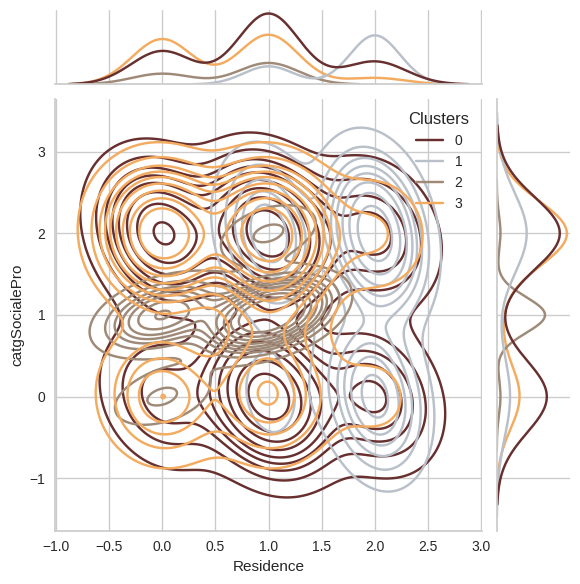

<Figure size 800x550 with 0 Axes>

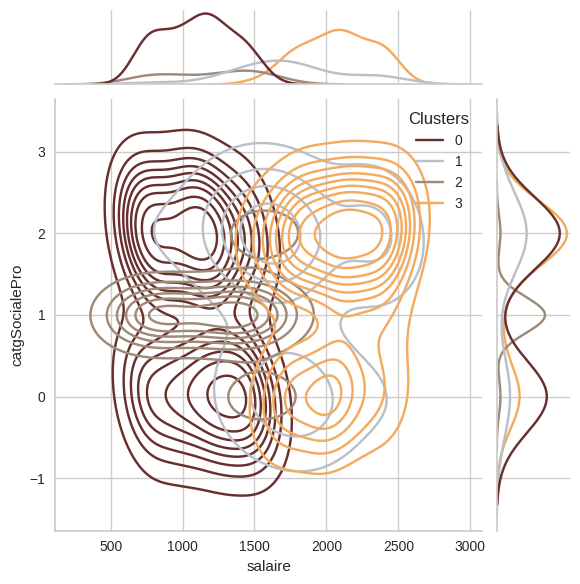

In [ ]:
Personal = [ "secteurTravail","Residence","salaire"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["catgSocialePro"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()


In [ ]:
# Selon les criteres globaux etat financiere et sociale on distingue 4 profil de clients

<a id="9"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CONCLUSION</p>

In this project, I performed unsupervised clustering. 
I did use dimensionality reduction followed by agglomerative clustering. 
I came up with 4 clusters and further used them in profiling customers in clusters according to their family structures and income/spending. 
This can be used in planning better marketing strategies. 

**<span style="color:#682F2F;"> If you liked this Notebook, please do upvote.</span>**

**<span style="color:#682F2F;">If you have any questions, feel free to comment!</span>**

**<span style="color:#682F2F;"> Best Wishes!</span>**

<a id="10"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">END</p>